<a href="https://colab.research.google.com/github/chalarm1405/multivariate/blob/main/chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multidimensional Scaling

#Example on list dataset

In [1]:
import pandas as pd

In [2]:
example_df = pd.read_csv('https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv') 
example_df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
from sklearn.decomposition import PCA

In [4]:

pca = PCA(n_components=2)

In [5]:
new_pca = pca.fit_transform(example_df.iloc[:,:-1])

In [6]:
from matplotlib import pyplot as plt

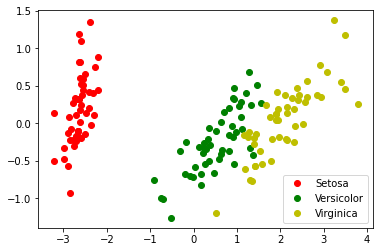

In [7]:
plt.plot(new_pca[:50,0],new_pca[:50,1], 'or' , label='Setosa')
plt.plot(new_pca[50:100,0],new_pca[50:100,1], 'og' , label='Versicolor')
plt.plot(new_pca[100:,0],new_pca[100:,1], 'oy' , label='Virginica')
plt.legend()

#MDS (Multidimensional Scaling)

#Distance

In [8]:
X1 = example_df.iloc[0,:-1].to_numpy()
X1

array([5.1, 3.5, 1.4, 0.2], dtype=object)

In [9]:
X2 = example_df.iloc[1,:-1].to_numpy()
X2

array([4.9, 3.0, 1.4, 0.2], dtype=object)

In [10]:
import numpy as np

In [11]:
dist = np.linalg.norm(X1-X2)
dist

0.5385164807134502

In [12]:
(0.04 + 0.25)**(0.05)

0.9399827849205659

#Distance Matrix

In [13]:
from sklearn.metrics import pairwise_distances
dis_matrix = pairwise_distances(example_df.iloc[:,:-1])
dis_matrix

array([[0.        , 0.53851648, 0.50990195, ..., 4.45982062, 4.65080638,
        4.14004831],
       [0.53851648, 0.        , 0.3       , ..., 4.49888875, 4.71805044,
        4.15331193],
       [0.50990195, 0.3       , 0.        , ..., 4.66154481, 4.84871117,
        4.29883705],
       ...,
       [4.45982062, 4.49888875, 4.66154481, ..., 0.        , 0.6164414 ,
        0.64031242],
       [4.65080638, 4.71805044, 4.84871117, ..., 0.6164414 , 0.        ,
        0.76811457],
       [4.14004831, 4.15331193, 4.29883705, ..., 0.64031242, 0.76811457,
        0.        ]])

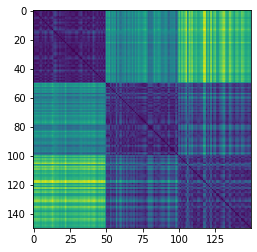

In [14]:
plt.imshow(dis_matrix)

In [15]:
from sklearn.manifold import  MDS

In [16]:
mds = MDS(n_components=2)

In [17]:
new_mds = mds.fit_transform(example_df.iloc[:,:-1])

In [18]:
new_mds

array([[-1.42029495e-01, -2.70902455e+00],
       [-6.52046665e-01, -2.65184025e+00],
       [-6.08444193e-01, -2.84308579e+00],
       [-7.79718919e-01, -2.66031008e+00],
       [-1.22960265e-01, -2.76179140e+00],
       [ 3.60726287e-01, -2.38035545e+00],
       [-5.32865203e-01, -2.80987859e+00],
       [-2.80696151e-01, -2.62248111e+00],
       [-1.04582774e+00, -2.77100344e+00],
       [-5.71028287e-01, -2.61951182e+00],
       [ 2.17998371e-01, -2.58535587e+00],
       [-4.13606933e-01, -2.58444989e+00],
       [-7.14040413e-01, -2.71521652e+00],
       [-1.03363912e+00, -3.11534789e+00],
       [ 7.27034759e-01, -2.82374391e+00],
       [ 9.35718045e-01, -2.59355859e+00],
       [ 3.76678258e-01, -2.73924851e+00],
       [-1.32258020e-01, -2.67408897e+00],
       [ 4.96378570e-01, -2.31974987e+00],
       [ 9.55104900e-02, -2.65765347e+00],
       [ 9.96765284e-04, -2.33839881e+00],
       [ 2.55114813e-02, -2.59462127e+00],
       [-3.77180633e-01, -3.23378525e+00],
       [-2.

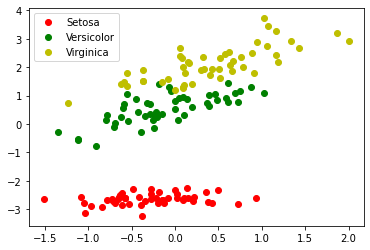

In [19]:

plt.plot(new_mds[:50,0],new_mds[:50,1], 'or' , label='Setosa')
plt.plot(new_mds[50:100,0],new_mds[50:100,1], 'og' , label='Versicolor')
plt.plot(new_mds[100:,0],new_mds[100:,1], 'oy' , label='Virginica')
plt.legend()

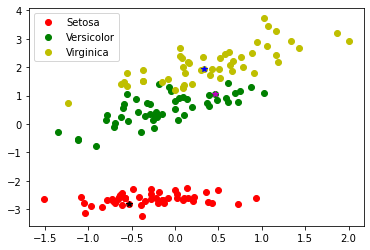

In [20]:

plt.plot(new_mds[:50,0],new_mds[:50,1], 'or' , label='Setosa')
plt.plot(new_mds[50:100,0],new_mds[50:100,1], 'og' , label='Versicolor')
plt.plot(new_mds[100:,0],new_mds[100:,1], 'oy' , label='Virginica')
plt.plot(new_mds[6,0],new_mds[6,1], '*k')
plt.plot(new_mds[56,0],new_mds[56,1], '*m')
plt.plot(new_mds[116,0],new_mds[116,1], '*b')
plt.legend()

#การใช้ Pre-computed Distance Matrix

In [21]:
mds2 = MDS(n_components=2, dissimilarity='precomputed')

In [22]:
new_mds2 = mds2.fit_transform(dis_matrix)

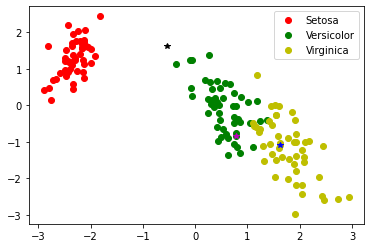

In [23]:
plt.plot(new_mds2[:50,0],new_mds2[:50,1], 'or' , label='Setosa')
plt.plot(new_mds2[50:100,0],new_mds2[50:100,1], 'og' , label='Versicolor')
plt.plot(new_mds2[100:,0],new_mds2[100:,1], 'oy' , label='Virginica')
plt.plot(new_mds[6,0],new_mds2[6,1], '*k')
plt.plot(new_mds2[56,0],new_mds2[56,1], '*m')
plt.plot(new_mds2[116,0],new_mds2[116,1], '*b')
plt.legend()

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [28]:
def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

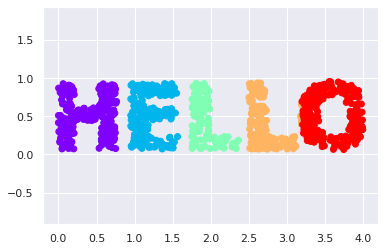

In [29]:
X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

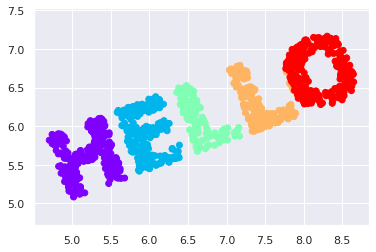

In [30]:
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)
    
X2 = rotate(X, 20) + 5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');

In [31]:

from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
D.shape

(1000, 1000)

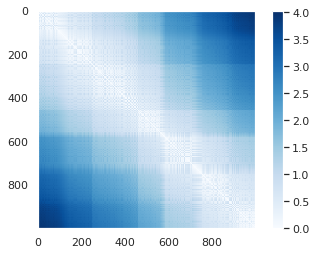

In [32]:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();

#Quiz4
ทำลองทำข้อมูล PCA กับข้อมูล

X
แล้ว plotgraph และดูว่าผลการกระจายข้อมูลเปลี่ยนไปหรือไม่

In [33]:
from sklearn.decomposition import PCA

In [34]:
pca = PCA(n_components=2)

In [35]:
X_pca = pca.fit_transform(X)

No handles with labels found to put in legend.


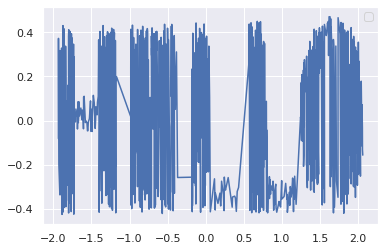

In [36]:
plt.plot(X_pca[:,0],X_pca[:,1])
plt.legend()